# COMP2200  Portfolio 3

### Student ID: 45870969
### Name: Keerthana Kannan
### URL: https://github.com/MQCOMP2200-S2-2020/portfolio-2020-keerthanakannan24.git

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

## Predicting the Genre of Books from Summaries

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) and includes meta-data about the genre of the books taken from Freebase.  Each book can have more than one genre and there are 227 genres listed in total.  To simplify the problem of genre prediction we will select a small number of target genres that occur frequently in the collection and select the books with these genre labels.  This will give us one genre label per book. 

Your goal in this portfolio is to take this data and build predictive models to classify the books into one of the five target genres.  You will need to extract suitable features from the texts and select suitable models to classify them. You should build and evaluate at least TWO models and compare the prediction results.

You should report on each stage of your experiment as you work with the data.


## Data Preparation

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](data/booksummaries/README.txt) file.

In [7]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

#Importing dataset and naming columns

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


We next filter the data so that only our target genre labels are included and we assign each text to just one of the genre labels.  It's possible that one text could be labelled with two of these labels (eg. Science Fiction and Fantasy) but we will just assign one of those here. 

In [8]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [4]:
# check how many books we have in each genre category
genre_books.groupby('genre').count()


,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


In [13]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(books.genre).toarray()

#Analysing the books dataset using vectorizer

In [14]:
print(vectorizer.get_feature_names())

['children', 'fantasy', 'fiction', 'literature', 'mystery', 'novel', 'science']


In [15]:
Y = books.genre

In [16]:
Y.isna().sum()

0

In [17]:
X.shape

(16559, 7)

In [18]:
Y.shape

(16559,)

In [19]:
Y.head(20)

0     Children's literature
1                     Novel
2                     Novel
3                          
4                   Fantasy
5                          
6                   Fantasy
7                          
8           Science Fiction
9           Science Fiction
10                         
11                         
12                         
13                         
14                         
15                         
16                         
17                         
18                         
19                         
Name: genre, dtype: object

### Training and Testing Data

In [20]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=142)

In [21]:
X_train.shape, Y_train.shape

((13247, 7), (13247,))

In [22]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [23]:
y_hat_test = lr.predict(X_test)

In [24]:
y_hat_train = lr.predict(X_train)

### Predictions

In [25]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(Y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(Y_test, y_hat_test))

Accuracy score on training set:  1.0
Accuracy score on testing set:  1.0


In [26]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(Y_test, y_hat_test))

Confusion matrix on test set: 
[[1556    0    0    0    0    0]
 [   0  205    0    0    0    0]
 [   0    0  445    0    0    0]
 [   0    0    0  271    0    0]
 [   0    0    0    0  458    0]
 [   0    0    0    0    0  377]]


In [27]:
print("Confusion matrix on train set: ")
print(confusion_matrix(Y_train, y_hat_train))

Confusion matrix on train set: 
[[6049    0    0    0    0    0]
 [   0  887    0    0    0    0]
 [   0    0 1866    0    0    0]
 [   0    0    0 1125    0    0]
 [   0    0    0    0 1800    0]
 [   0    0    0    0    0 1520]]


In [36]:
linear_model = LogisticRegression()
rfe = RFE(estimator=linear_model, n_features_to_select=5, step=1)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [37]:
#doing the evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(Y_test, y_test_hat))

accuracy score on test set:  1.0


In [38]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 2.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000


In [40]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, Y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(Y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5836352657004831
Acc on test set using 2 features:  0.6455314009661836
Acc on test set using 3 features:  0.779891304347826
Acc on test set using 4 features:  0.9181763285024155
Acc on test set using 5 features:  1.0
Acc on test set using 6 features:  1.0
Acc on test set using 7 features:  1.0
Acc on test set using 8 features:  1.0
Acc on test set using 9 features:  1.0


c:\users\keert\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\keert\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\keert\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\keert\appdata\local\programs\python\python38-32\lib\site-package

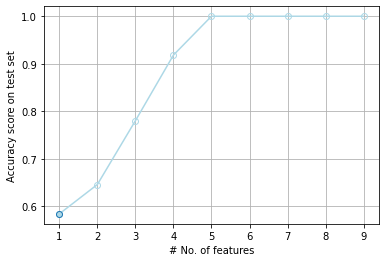

In [41]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, Y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(Y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

In [20]:
genre_books.summary

0         Old Major, the old boar on the Manor Farm, ca...
1         Alex, a teenager living in near-future Englan...
2         The text of The Plague is divided into five p...
4         The novel posits that space around the Milky ...
6         Ged is a young boy on Gont, one of the larger...
                               ...                        
16525     Beautiful Creatures is set in fictional Gatli...
16526     After returning home, more strange things are...
16531                                           ==Receptio
16532     The novel is split into seven parts, the firs...
16549     The story starts with former government agent...
Name: summary, Length: 8954, dtype: object

# KNN Classifer

In [22]:
genre_books.head()

,title,author,date,summary,genre
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy


In [23]:
# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_test_predictions = clf_knn.predict(X_test)
print(len(y_test_predictions)) #this should be the same as the X_test shape and y_test shape

print("Accuracy on test set: ", accuracy_score(Y_test,y_test_predictions))

3312
Accuracy on test set:  0.36745169082125606


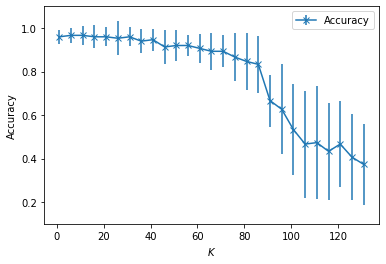

In [34]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, genre_books.data, genre_books.target, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [36]:
parameter_grid = {'n_neighbors': range(1,135,5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(genre_books.data,genre_books.target)

print("Best K value is:", gs_knn.best_params_['n_neighbors'])
print("Best Accuracy on Optimal K value is:", gs_knn.best_score_)

Best K value is: 21
Best Accuracy on Optimal K value is: 0.9800000000000001


### Conclusion

The analysis made on the books dataset indicated that it has a very high accuracy score and high chances the predications based on the analysis would be correct.